In [1]:
#Assuming an Istropic XXX Heisenberg model without periodic boundary conditions. Setting the coupling constant J to 1. 
#The number 'n'of spins in the spin chain can be chosen at will, so can 'r,' the number of steps in the Trotterization. 
#Since the error goes at $t^2/r$, it can be made small by choosing a large value of r. 
#Here, I will take 't' to be pi/16, 'n' to be 5 and 'r' to be 50. The time taken for the algorithm to run is recorded at the end.
import qiskit
from qiskit import *
from qiskit.circuit import Parameter
from qiskit.opflow import X, Y, Z, PauliTrotterEvolution #X denotes pauli-x, Y denotes pauli-y, and Z denotes pauli-z.

C:\Users\IBRAHIM SHEHZAD\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\IBRAHIM SHEHZAD\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\IBRAHIM SHEHZAD\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


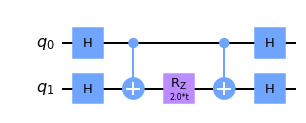

In [2]:
#Deriving exp(-i t X^X) in terms of cnot's and single qubit rotations using PauliTrotter. Will later use H = X Y^1/2

operator=X^X
time = Parameter('t')
evol_op = (time*operator).exp_i()
n_timeslices = 1
trotterized_op = PauliTrotterEvolution(
                    trotter_mode='trotter',
                    reps=n_timeslices).convert(evol_op)
trot_op_circ = trotterized_op.to_circuit()
trot_op_circ_decomp = trot_op_circ.decompose()
trot_op_circ_decomp = trot_op_circ_decomp.decompose()
trot_op_circ_decomp.draw('mpl')

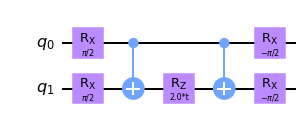

In [3]:
#Deriving exp(-i t Y^Y) in terms of cnot's and single qubit rotations using PauliTrotter

operator2=Y^Y 
evol_op = (time*operator2).exp_i()
trotterized_op = PauliTrotterEvolution(
                    trotter_mode='trotter',
                    reps=n_timeslices).convert(evol_op)
trot_op_circ = trotterized_op.to_circuit()
trot_op_circ_decomp = trot_op_circ.decompose()
trot_op_circ_decomp = trot_op_circ_decomp.decompose()
trot_op_circ_decomp.draw('mpl')

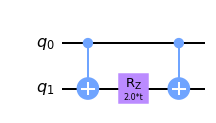

In [4]:
#Deriving exp(-i t Z^Z) in terms of cnot's and single qubit rotations using PauliTrotter

operator3=Z^Z 
evol_op = (time*operator3).exp_i()
trotterized_op = PauliTrotterEvolution(
                    trotter_mode='trotter',
                    reps=n_timeslices).convert(evol_op)
trot_op_circ = trotterized_op.to_circuit()
trot_op_circ_decomp = trot_op_circ.decompose()
trot_op_circ_decomp = trot_op_circ_decomp.decompose()
trot_op_circ_decomp.draw('mpl')

In [10]:
#Now constructing the exponentiated operators derived above.
import numpy as np

t=np.pi/16
n=4 #number of spins in the spin chain
r=50 #number of trotter steps

#Using H = X Y^1/2
#The following represents e^(-it X^X)
XX_qr = QuantumRegister(2)
XX_qc = QuantumCircuit(XX_qr)
XX_qc.ry(np.pi/2,[0,1])
XX_qc.rx(np.pi,[0,1])
XX_qc.cnot(0,1)
XX_qc.rz(2 * t/r, 1)
XX_qc.cnot(0,1)
XX_qc.ry(-np.pi/2,[0,1])
XX_qc.rx(-np.pi,[0,1])
XX = XX_qc.to_instruction()

#The following represents e^(-it Y^Y)
YY_qr = QuantumRegister(2)
YY_qc = QuantumCircuit(YY_qr)
YY_qc.rx(np.pi/2,[0,1])
YY_qc.cnot(0,1)
YY_qc.rz(2 * t/r, 1)
YY_qc.cnot(0,1)
YY_qc.rx(-np.pi/2,[0,1])
YY = YY_qc.to_instruction()

#The following represents e^(-it Z^Z)
ZZ_qr = QuantumRegister(2)
ZZ_qc = QuantumCircuit(ZZ_qr)
ZZ_qc.cnot(0,1)
ZZ_qc.rz(2 * t/r, 1)
ZZ_qc.cnot(0,1)
ZZ = ZZ_qc.to_instruction()

In [11]:
#This generates the final circuit
Trot_qr = QuantumRegister(n)
Trotter_qc = QuantumCircuit(Trot_qr)
Trotter_qc.x([Trot_qr[0], Trot_qr[1]]) #considering the state |1100> #for each qubit, |0> is the spin up state and |1> is spin down.
for j in range(1, r+1):
       for i in range(0, n - 1): #not assuming periodic boundary conditions
            Trotter_qc.append(XX, [Trot_qr[i], Trot_qr[i+1]])
            Trotter_qc.append(YY, [Trot_qr[i], Trot_qr[i+1]])
            Trotter_qc.append(ZZ, [Trot_qr[i], Trot_qr[i+1]])


                    

In [12]:
#Computes the time evolution of |1100>
backend=Aer.get_backend('statevector_simulator') 
job=execute(Trotter_qc,backend,shots=10^4)
result=job.result().get_statevector(Trotter_qc,decimals=4)
print(result)
print("Time taken: {} sec".format(job.result().time_taken)) 



Statevector([ 5.000e-04+0.1853j, -0.000e+00+0.j    , -0.000e+00+0.j    ,
              9.435e-01-0.1926j, -0.000e+00+0.j    ,  0.000e+00+0.0049j,
             -3.680e-02-0.0024j,  0.000e+00-0.j    ,  0.000e+00+0.j    ,
             -3.680e-02-0.0024j,  0.000e+00+0.0049j,  0.000e+00-0.j    ,
             -3.730e-02+0.0025j, -0.000e+00-0.j    , -0.000e+00-0.j    ,
              5.000e-04+0.1853j],
            dims=(2, 2, 2, 2))
Time taken: 0.03502631187438965 sec


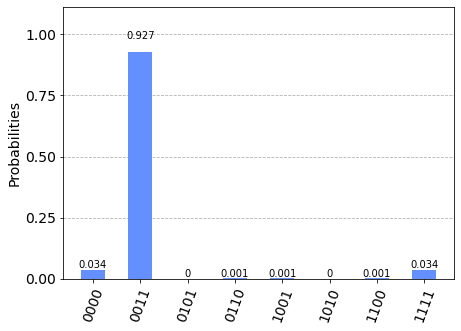

In [13]:
#Plotting the result of time evolution below
from qiskit.tools.visualization import plot_histogram
job.result().get_counts() 
plot_histogram(job.result().get_counts())

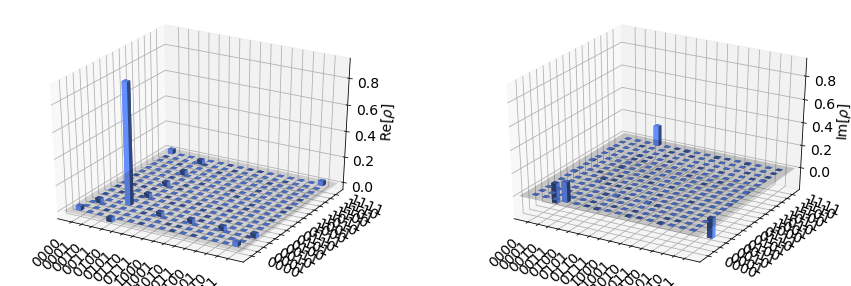

In [14]:
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_state_city 
plot_state_city(result) #plots the density matrix